## 1.1
A função $f$ escolhida é $ f(x) = (x+1)(x-\sqrt{10})$, já que, $f(\sqrt{10})=0$ e, pelo intervalo dado, $f(0)=-\sqrt{10} < 0$ e $f(20)=21(20-\sqrt{10}) > 0$ visto que $3 < \sqrt{10} < 4$. Dessa forma, pelo teorema do valor intermediário, podemos usar o método da bisseção.

Para calcular o número de interações necessárias com um erro máximo de $10^{-8}$, utilizamos o resultado
$$
t_i = \frac{b-a}{2^k}
$$
onde $t_i$ é o tamanho do intervalo e $k$ é o número de interações realizadas pelo algoritmo em um certo momento. Dessa forma,
\begin{align*}
10^{-8} &= \frac{20-0}{2^k}\\
2^k &= \frac{20}{10^{-8}}\\
k &= \log_2(2*10^9)
\end{align*}
pois assim o intervalo observado em um certo momento é no máximo $10^{-8}$, e assim garantimos o teto do erro. Vale frizar também que esse erro é no domínio, pois $a$ e $b$ são pontos no domínio da função $f$. O algoritmo abaixo faz o cálculo baseado nestes argumentos.

In [13]:
# Função f que será utilizada
f(x) = (x+1)*(x-sqrt(10))

# Valor inicial do intervalo
a = 0
#Valor final do intervalo
b = 20
# Menor tamanho do intervalo que será analisado
tam = 10^-8

# f: Função que queremos descobrir uma raiz
# a: Primeiro ponto no intervalo analisado
# b: Último ponto no intervalo analisado
# tam: Menor tamanho do intervalo analisado
function bissecao(f,a,b,tam) 
    # Testa se f(a) e f(b) possuem sinais trocados
    if(f(a)*f(b) > 0)
        throw(error("A função não possue os sinais trocados nos pontos f(a) e f(b)"))
    end
    
    # Número de interações que serão calculadas
    # Utilizamos a função floor para retornar apenas a parte inteira do número. 
    # Somamos o valor 1 para retornar um teto maior
    k = floor(log2(abs(a-b)/tam)) + 1
    
    # Repete k vezes.
    for i in 0:k
        # Divide o intervalo em duas partes iguais. A variável m é o "ponto" no meio desse intervalo.
        m = (a+b)/2
        # Se f(a)*f(m) < 0, então quer dizer que a raiz está no intervalo [a,m)
        if(f(a)*f(m) < 0)
            # O último ponto do intervalo observado passa a ser m, dessa forma olhamos para o intervalo [a,m)
            b = m
        # Se f(m)*f(b) < 0, então quer dizer que a raiz está no intervalo (m,b]
        elseif(f(m)*f(b) < 0)
             # O primeiro ponto do intervalo observado passa a ser m, dessa forma olhamos para o intervalo (m,b]
            a = m
        # Senão, m é raiz.
        #= OBS.: Esse último caso pode ser difícil ocorrer devido a imprecisão do ponto flutuante e
        a termos a sorte de a raiz estar exatamente no meio do intervalo.
        =#
        else
            # Retorna o resultado, já que encontramos a raiz
            return m
        end
    end

    # Retorna o resultado final. 
    # A média aqui serve apenas para melhorar o resultado, mas poderíamos printar a ou b.
    return (a+b)/2
end

#  Printa o resultado
print("√10 ≈ ", bissecao(f,a,b,tam))

√10 ≈ 3.162277659866959

## 1.2

In [15]:
# x: Valor inicial
# f: Função f(x)
# f_linha: Derivada da função f(x)
# n: Número de interações que serão feitas
function newton(x,f,f_linha,n)
    # Método de newton sendo aplicado. A cada iteração, temos uma aproximação melhor.
    # Itera de 1 até n
    for i in 1:n
        x = x - f(x)/f_linha(x)
    end
    # Retorna a aproximação desejada
    return x
end

newton (generic function with 1 method)

In [25]:
# Primeiro valor do intervalo
a = -100
# Último valor do intervalo
b = 100

# Tamanho do intervalo pedido
tam = 10^-2

# Número de iterações que serão utilizadas no método de newton
n = 30

# Função f
f(x) = x^5+x^2+3

# Derivada da função f
f_linha(x) = 5*x^4+2*x

# 
function bissnewton(f,f_linha,a,b,tam,n)
    x = bissecao(f,a,b,tam)
    if x == 0
        return 0
    else
        return newton(x,f,f_linha,n)
    end
end
    
print(bissnewton(f,f_linha,a,b,tam,n))

-1.3733913786816283

## 1.3

### 1

A função que nos interessa é $f(x) = \ln(3x)$ quando $x=1$. Tornando ambos os lados como o expoente da função $e$, temos
\begin{align*}
e^{f(1)} = 3
\end{align*}
pois x = 1. Isolando o 3
\begin{align*}
e^{f(1)} - 3 = 0
\end{align*}
Dessa forma, procuramos a raiz da função
\begin{align*}
g(y)=e^y-3 
\end{align*}
onde $y = f(1) = \ln(3)$

In [27]:
# Função utlizada
g(y)=exp(y)-3
# Utilizamos a=0 pois e⁰-3 = 1-3 = -2 < 0
a = 0
# Utilizamos b=2 pois e²-3 = e*e-3 e como e = 2.71.., então e²-3 > 0
b = 2
tam = 10^-3

print(bissecao(g,a,b,tam))

1.098388671875

### 2

Podemos utilizar o mesmo resultado do item 1 acima. Além disso, precisamos da primeira derivada, ou seja
$$
g'(y) = e^y
$$
e também do chute inicial. Do mesmo modo, como no item anterior, sabemos que a raiz está entre $g(0)=-2$ e $g(2)\approx4.3890$, sendo assim, tomando a média desses dois resultados, podemos supor um chute inicial $x=1.1945$. O algoritmo será

In [36]:
# Derivada da função g
g_linha(x) = exp(x)
# Número de passos
n = 20
# CHute inical
x = 1.1945
# Imprime o resultado
print(newton(x,g,g_linha,n))

1.0986122886681098

## 1.4

Vamos utilizar 3 pontos conhecidos da função $\cos(x)$. Os pontos que temos para utilizar na interpolação são
$$
\left\{\left(\frac{\pi}{6},\frac{\sqrt{3}}{2}\right) , \left(\frac{\pi}{4},\frac{\sqrt{2}}{2}\right) , \left(\frac{\pi}{3},\frac{1}{2}\right)\right\}
$$
onde $\frac{\pi}{6} = 30°,\frac{\pi}{4} = 45°$ e $\frac{\pi}{3}=60°$.
Dessa forma, teremos um polinômio de grau 2 da forma
$$
y_i=c_1+c_2x_i+c_3x_i^2
$$
com $1 \le i \le 3 \in \mathbb{N}$. A matriz de vandermonde será
$$
Vc=y\\
\begin{bmatrix} 
  1 & \frac{\pi}{6} & (\frac{\pi}{6})^2 \\ 
  1 & \frac{\pi}{4} & (\frac{\pi}{4})^2 \\
  1 & \frac{\pi}{3} & (\frac{\pi}{3})^2
\end{bmatrix}
\begin{bmatrix} 
  c_0 \\
  c_1 \\
  c_2
\end{bmatrix} =
\begin{bmatrix} 
  \frac{\sqrt{3}}{2}\\
  \frac{\sqrt{2}}{2}\\
  \frac{1}{2}
\end{bmatrix} 
$$
Abaixo é utilizado um algoritmo para calcular a matriz coluna $c$

In [1]:
using LinearAlgebra
# x's conhecidos
V = [1 π/6 (π/6)^2 ; 1 π/4 (π/4)^2 ; 1 π/3 (π/3)^2]
# y's conhecidos
y = [√3/2;√2/2;1/2]
# Resolve o sistema linear, ou seja, encontra os coeficientes da matriz coluna c
c = V\y

# Montagem do polinômio. c[i] representa o i-ésimo elemento da matriz coluna c.
f(x) = c[1] + c[2]*x + c[3]*x^2

# Printa o resultado levando em consideração que 2π/9 = 40°
print("cos(40°) ≈ ", f(2π/9))

cos(40°) ≈ 0.7654338952290285

## 1.5

In [18]:
V = [1 15 15^2; 1 16.5 16.5^2; 1 17.5 17.5^2]
y = [34; 30; 25]

c = V\y

println(c)

g(x) = c[1] + c[2]*x+c[3]*x^2

print(bissecao(g,0,25,10^-2))

[-156.9999999999989, 26.733333333333196, -0.9333333333333291]


LoadError: A função não possue os sinais trocados nos pontos f(a) e f(b)

## 1.6

Utilizando a ideia do método de Lagrange, sabemos que
$$
A(x,y) = 800L_1(x,y)+600L_2(x,y)+400L_3(x,y)+500L_4(x,y)
$$
onde 
\begin{align*}
L_1 &= \frac{(x_1-x)(y_1-y)}{(x_1-x_0)(y_1-y_0)}\\
L_2 &= \frac{(x-x_0)(y_1-y)}{(x_1-x_0)(y_1-y_0)}\\
L_3 &= \frac{(x_1-x)(y-y_0)}{(x_1-x_0)(y_1-y_0)}\\
L_4 &= \frac{(x-x_0)(y-y_0)}{(x_1-x_0)(y_1-y_0)}
\end{align*}
já que quando $L_i(x,y) = 1$, $L_j(x,y) = 0$ para $i \ne j$. Simplificando o denominador de cada fração, encontramos a função simplificada
\begin{align*}
A(x,y) &= \frac{1}{(x_1-x_0)(y_1-y_0)}(800(x_1-x)(y_1-y)+600(x-x_0)(y_1-y)+400(x_1-x)(y-y_0)+500(x-x_0)(y-
y_0))\\
A(x,y) &= \frac{1}{(3-1)(4-2)}(800(3-x)(4-y)+600(x-1)(4-y)+400(3-x)(y-2)+500(x-1)(y-
2))\\
A(x,y) &= \frac{1}{4}(800(3-x)(4-y)+600(x-1)(4-y)+400(3-x)(y-2)+500(x-1)(y-
2))\\
A(x,y) &= 200(3-x)(4-y)+150(x-1)(4-y)+100(3-x)(y-2)+125(x-1)(y-
2)
\end{align*}
Para descobrir os possíveis mínimo e o máximo globais, é preciso primeiro saber quais são os pontos críticos da função acima $A$. Como a função é uma soma de polinômios, então sabemos que ela é diferenciável em todo o domínio, e dessa forma não há pontos não diferenciáveis que seriam pontos críticos, com isso, resta saber se o gradiente se anula em algum ponto. Depois de derivar $A$ na direção $\vec i$ e $\vec j$, e avaliar a derivada nos pontos dados pela tabela, chegamos ao resultado
\begin{align*}
A_x(x,y) &= 75y-250\\
A_y(x,y) &= 75x-275
\end{align*}
Precisamos que as derivadas parciais acima se anulem, então
\begin{align*}
75y-250 &= 0\\
y &= 3.333\cdots\\
75x-275 &= 0\\
x &= 3.666\cdots
\end{align*}
Dessa forma, o ponto próximo a $(3.333,3.666,A(3.333,3.666))$ é um ponto crítico da função $A$. Agora, para responder a questão, precisamos utilizar o determinante da matriz hessiana no intuito de saber o tipo de ponto crítico que estamos trabalhando. Com isso, derivando novamente, encontramos
\begin{align*}
A_{xy}(x,y) &= -250\\
A_{yx}(x,y) &= -275\\
A_{xx}(x,y) &= A_{yy}(x,y) = 0
\end{align*}
e o determinante será
$$
H(x,y) = A_{xx}(x,y)A_{yy}(x,y) - A_{xy}(x,y)A_{yx}(x,y) = -68750
$$
Como $H(x,y) < 0$, então concluímos que o ponto crítico é um ponto de sela. Dessa forma, os máximos e mínimos estarão na fronteira do domínio procurado, que é o quadrado de vértices no plano xy $(1,4),(3,4),(1,2),(3,2)$. Sendo assim, começando pelo lado $L_1$ onde $x=1$ e $y \in [2,4]$, temos que
$$
A(1,y)=1200-200y
$$
Pela equação é possível notar que para $A(1,2)$ encontramos o maior valor neste lado, ou seja $800$, e para $A(1,4)$ o menor, ou seja, $400$. Olhando para todos os lados, encontramos o resultado
\begin{align*}
A(1,y)&=1200-200y & y \in [2,4]\\
A(x,4)&=350+50x & y \in [1,3]\\
A(3,y)&=700-50y & y \in [2,4]\\
A(x,2)&=900+100x & y \in [1,3]\\
\end{align*}
e buscando um valor mínimo e máximo globais, ou seja, o menor valor e maior valor possíveis respectivamente para a função com os domínios acima, encontramos que $A(3,2)=1200$ é o máximo global e $A(1,4)=400$ é o mínimo global.

## 1.7

Os polinômios que serão plotados possuem a forma
\begin{align*}
P_3(x) &= c_0 + c_1x + c_2x^2+c_3x^3\\
Q_3(x) &= d_0 + d_1x + d_2x^2+d_3x^3
\end{align*}
Dessa forma precisamos de 8 equações para encontrar uma possível solução determinada. Então, utilizando os parâmetros que serão dados pelo usuário, ou seja, $(x_0,y_0),(x_1,y_1),\cdots,(x_4,y_4)$, sabemos
\begin{align*}
y_i &= c_0 + c_1x_i + c_2x_i^2+c_3x_i^3 & 0 \le i \le 2\\
y_i &= d_0 + d_1x_i + d_2x_i^2+d_3x_i^3 & 2 \le i \le 4
\end{align*}
vale frizar que $P_3(x_2) = Q_3(x_2)$, por isso temos $i = 2$ para os dois ponlinômios acima. Como temos apenas 6 equações até o momento, precisamos de mais duas. Podemos pedir que a primeira e segunda derivadas dos polinômios sejam iguais na reta $x_2$ onde $P_3 = Q_3$, ou seja,
\begin{align*}
P_3'(x_2) &= Q_3'(x_2)\\
c_1 + 2c_2x_2+3c_3x_2^2 &= d_1 + 2d_2x_2+3d_3x_2^2\\
P_3''(x_2) &= Q_3''(x_2)\\
2c_2+6c_3x_2 &= 2d_2+6d_3x_2\\
\end{align*}
e isolando todos os termos, temos
\begin{align*}
c_1 + 2c_2x_2+3c_3x_2^2 -d_1 - 2d_2x_2-3d_3x_2^2 &= 0\\
2c_2+6c_3x_2 - 2d_2-6d_3x_2 &= 0
\end{align*}
Agora temos 8 equações e 8 variáveis como queríamos. Para resolver este sistema, vamos utilizar as matrizes
$$
\begin{bmatrix}
1 & x_0 & x_0^2 & x_0^3 & 0 & 0 & 0 & 0\\
1 & x_1 & x_1^2 & x_1^3 & 0 & 0 & 0 & 0\\
1 & x_2 & x_2^2 & x_2^3 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 1 & x_2 & x_2^2 & x_2^3\\
0 & 0 & 0 & 0 & 1 & x_3 & x_3^2 & x_3^3\\
0 & 0 & 0 & 0 & 1 & x_4 & x_4^2 & x_4^3\\
0 & 1 & 2x_2 & 3x_2^2 & 0 & -1 & -2x_2 & -3x_2^2\\
0 & 0 & 2 & 6x_2 & 0 & 0 & -2 & -6x_2
\end{bmatrix}
\begin{bmatrix}
c_0\\
c_1\\
c_2\\
c_3\\
d_0\\
d_1\\
d_2\\
d_3
\end{bmatrix}
=
\begin{bmatrix}
y_0\\
y_1\\
y_2\\
y_2\\
y_3\\
y_4\\
0\\
0
\end{bmatrix}
$$
O algoritmo abaixo calcula os coeficientes procurados

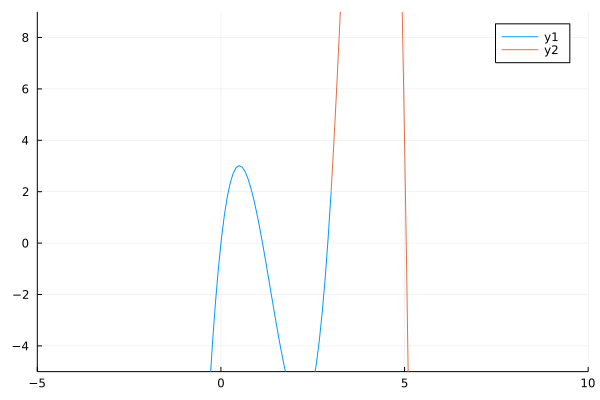

In [1]:
# Recebe duas listas. Uma contém apenas os valores x_i e a outra os valores y_i
# Retorna as constantes c_0,c_1,..,c_3,d_0,...,d_3 ordenadas em uma matriz coluna.
function interpolacao_por_partes(x,y)
    V = 
    [1 x[1] x[1]^2 x[1]^3 0 0 0 0;
    1 x[2] x[2]^2 x[2]^3 0 0 0 0;
    1 x[3] x[3]^2 x[3]^3 0 0 0 0;
    0 0 0 0 1 x[3] x[3]^2 x[3]^3;
    0 0 0 0 1 x[4] x[4]^2 x[4]^3;
    0 0 0 0 1 x[5] x[5]^2 x[5]^3;
    0 1 2*x[3] 3*x[3]^2 0 -1 -2*x[3] -3*x[3]^2;    
    0 0 2 6*x[3] 0 0 -2 -6*x[3];
    ]
    
    b = [y[1]; y[2]; y[3]; y[3]; y[4]; y[5]; 0; 0]
    
    # Retorna o resultado do sistema como uma matriz coluna
    return V\b
end

# Valores x_i e y_i que juntos formam os pontos (x_i,y_i).
#= É importante frizar que os valores menores na lista x estão mais a esquerda, enquanto os maiores
mais a direita devido aos cálculos do algoritmo e por causa do plot.
Além disso não é possivel que haja um valor de y_i atingido por dois valores distintos x_i e x_j,
já que não faria sentido para um função real.
=#
x = [0,1,3,4,5]
y = [0,1,2,30,4]

# Coeficientes calculados
coef = interpolacao_por_partes(x,y)

# Polinômios P e Q gerados
p(x) = coef[1]+ coef[2]*x+ coef[3]*x^2+coef[4]*x^3
q(x) = coef[5]+ coef[6]*x+ coef[7]*x^2+coef[8]*x^3

# Incremento no domínio e no contradomínio para uma melhor visualição
k = 5

# Domínio dos polinômios P e Q.
# Mais valores no domínio foram usados para melhor visualização.
Xp = range(x[1]-k, x[3], length = 100)
Xq = range(x[3], x[5]+k, length = 100)

using Plots

#= Plota os polinômios. 
Aqui também foi aumentado o conjunto do domínio e também do contradomínio 
para que possa ser possíveis ver mais pontos serem plotados.
=#
plot(p, Xp, ylims=(y[1]-k,y[5]+k),xlims=(x[1]-k,x[5]+k))
plot!(q, Xq)